<a href="https://colab.research.google.com/github/WandersonGustavo/Imersao_Alura/blob/main/dnit_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot 
import statsmodels.formula.api as sm

In [2]:
base=pd.read_csv('contagem_de_trafego_cgplan.csv',error_bad_lines=False, sep=";")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
len(base)

6769

In [ ]:
base

,ID,id_trecho_,vl_br,sg_uf,nm_tipo_tr,sg_tipo_tr,desc_coinc,vl_codigo,ds_local_i,ds_local_f,...,E_D,F_D,G_D,H_D,I_D,J_D,VMDa_C,VMDa_D,NS_C,NS_D
0,4317,155030,307,AC,Eixo Principal,B,-,307BAC0005,ENTR AC-190/378 (MARECHAL TAUMATURGO),ENTR AC-090 (PORTO VALTER),...,-,-,-,-,-,-,-,-,-,-
1,4318,155031,307,AC,Eixo Principal,B,-,307BAC0010,ENTR AC-090 (PORTO VALTER),INÍCIO TRECHO IMPLANTADO,...,-,-,-,-,-,-,-,-,-,-
2,4319,158261,307,AC,Eixo Principal,B,-,307BAC0015,INÍCIO TRECHO IMPLANTADO,ENTR RAMAL 03,...,-,-,-,-,-,-,-,-,-,-
3,4320,158260,307,AC,Eixo Principal,B,-,307BAC0018,ENTR RAMAL 03,INÍCIO TRECHO PAVIMENTADO,...,-,-,-,-,-,-,-,-,-,-
4,4321,158259,307,AC,Eixo Principal,B,-,307BAC0020,INÍCIO TRECHO PAVIMENTADO,ENTR BR-364(A),...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6764,3434,160957,242,TO,Eixo Principal,B,-,242BTO0500,ENTR AV. JOAQUIM BATISTA DE OLIVEIRA (FORMOSO ...,ENTR TO-070 (FORMOSO DO ARAGUAIA),...,6,4,0,0,344,43,569,547,A,A
6765,3435,154198,242,TO,Eixo Principal,B,-,242BTO0510,ENTR TO-070 (FORMOSO DO ARAGUAIA),ENTR TO-181(A),...,-,-,-,-,-,-,-,-,-,-
6766,3436,154199,242,TO,Eixo Principal,B,-,242BTO0512,ENTR TO-181(A),ENTR TO-181(B),...,-,-,-,-,-,-,-,-,-,-
6767,3437,154200,242,TO,Eixo Principal,B,-,242BTO0520,ENTR TO-181(B),PORTO PIAUÍ (RIO JAVAÉS),...,-,-,-,-,-,-,-,-,-,-


In [ ]:
#Tratando dados, primeiro verificar NaN nos id's
idAgrupado=base.groupby(['ID']).size()
idAgrupado

ID
1       1
2       1
3       1
4       1
5       1
       ..
7606    1
7607    1
7608    1
7609    1
7610    1
Length: 6769, dtype: int64

In [ ]:
#verficar se há estados duplicados ou inexistentes
ufAgrupado=base.groupby(['sg_uf']).describe()
ufAgrupado

ID                                                              \
       count         mean          std     min      25%     50%      75%   
sg_uf                                                                      
AC      70.0  4820.371429   400.377401  4317.0  4541.25  5035.5  5052.75   
AL      91.0  3387.934066  2423.731681   658.0   680.50  4417.0  6104.50   
AM     225.0  3446.120000   842.690784  2559.0  2742.00  3031.0  4355.00   
AP      35.0  2273.742857   290.210810  2093.0  2101.50  2110.0  2436.00   
BA     544.0  3209.248162  2396.212626   104.0  1134.75  3288.5  4848.25   
CE     211.0  3093.706161  2209.711843   121.0  1288.50  2824.0  5861.50   
DF      89.0  2994.415730  2837.157784     1.0   441.00  3454.0  6399.00   
ES     146.0  4194.431507  2562.598210   644.0   777.25  4729.5  6920.75   
GO     362.0  2945.903315  2556.900986    11.0   537.25  2056.5  5076.75   
MA     177.0  3186.129944  1723.840005    23.0  1699.00  2911.0  4441.00   
MG     913.0  4373.743702  2244.711876   273.0  1876.00  4901.0  6483.00   
MS     244.0  3383.426230  1936.990691   482.0  2172.75  3695.5  5000.25   
MT     265.0  2756.924528  1536.767362   571.0  2197.00  2435.0  3409.00   
PA     214.0  2782.686916  1498.052670    35.0  2446.25  2499.5  3133.75   
PB     155.0  3487.890323  2169.145273   782.0  1153.50  3170.0  5926.50   
PE     188.0  3459.196809  2237.174449   795.0  1165.75  3253.5  6014.75   
PI     231.0  4009.558442  1999.830753   102.0  2888.50  4519.0  4804.50   
PR     490.0  4375.295918  1848.542731   819.0  2513.25  4021.5  5553.75   
RJ     262.0  3499.312977  2863.227461   256.0   845.25  1555.5  6983.75   
RN     188.0  3409.367021  2171.686298   653.0  1114.75  2966.5  5937.25   
RO     118.0  5470.627119   871.858039  2656.0  5188.25  5217.5  6194.75   
RR     135.0  3651.807407  1533.917984  2661.0  2694.50  2728.0  5844.50   
RS     478.0  4419.261506  2119.243353   907.0  2255.25  4249.5  6632.75   
SC     278.0  4097.100719  2275.050705   654.0  1965.25  4088.5  6693.75   
SE      60.0  2223.800000  1794.351909   976.0   990.75  1005.5  3334.25   
SP     445.0  3969.435955  2394.069013   382.0  1496.00  3892.0  5716.00   
TO     155.0  2255.077419  1802.542669    61.0    99.50  2037.0  3344.50   

              id_trecho_                 ...  vl_br        id_versao        \
          max      count           mean  ...    75%    max     count  mean   
sg_uf                                    ...                                 
AC     6057.0       70.0  157241.128571  ...  364.0  409.0      70.0  52.0   
AL     7586.0       91.0  154954.901099  ...  316.0  424.0      91.0  52.0   
AM     6068.0      225.0  154476.737778  ...  307.0  413.0     225.0  52.0   
AP     2764.0       35.0  153140.600000  ...  183.0  210.0      35.0  52.0   
BA     7594.0      544.0  154424.340074  ...  330.0  498.0     544.0  52.0   
CE     7597.0      211.0  154458.549763  ...  304.0  437.0     211.0  52.0   
DF     7466.0       89.0  153801.191011  ...  450.0  479.0      89.0  52.0   
ES     7439.0      146.0  155281.047945  ...  439.0  484.0     146.0  52.0   
GO     7465.0      362.0  154283.864641  ...  352.0  490.0     362.0  52.0   
MA     7496.0      177.0  154866.502825  ...  308.0  402.0     177.0  52.0   
MG     7593.0      913.0  155236.346112  ...  381.0  499.0     913.0  52.0   
MS     7262.0      244.0  154428.323770  ...  359.0  497.0     244.0  52.0   
MT     7279.0      265.0  153884.641509  ...  242.0  364.0     265.0  52.0   
PA     7483.0      214.0  153845.196262  ...  230.0  422.0     214.0  52.0   
PB     7587.0      155.0  154655.070968  ...  361.0  434.0     155.0  52.0   
PE     7598.0      188.0  154462.787234  ...  361.5  428.0     188.0  52.0   
PI     7595.0      231.0  154524.220779  ...  343.0  407.0     231.0  52.0   
PR     7288.0      490.0  155641.702041  ...  376.0  487.0     490.0  52.0   
RJ     7592.0      262.0  154964.702290  ...  442.5  495.0     262.0  52.0   
RN     7610.0

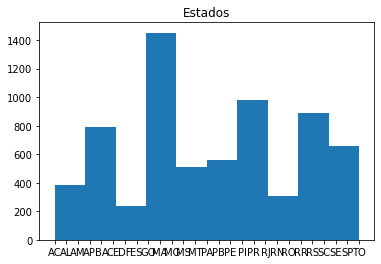

<Figure size 3600x3456 with 0 Axes>

In [ ]:
#histograma relacionando os estados, o estado de Minas Gerais apresenta maior intensidade no trafego
histogramaUF=plt.hist(base['sg_uf'])
histogramaUF=plt.title("Estados")
histogramaUF=plt.figure( figsize=(50, 48))
histogramaUF=plt.gcf().set_size_inches(50, 48)
histogramaUF

In [ ]:
#distplot dos estados
#bpUF=srn.distplot(base['vl_km_i_estim']).set_title("Estimativa de km's rodados por trecho ")
#bpUF

In [ ]:
#verificar duplicações nos vl_codigo , ao todo 432 duplicados, ou seja a recorrência em 432 vias
duplicados=base.duplicated(['vl_codigo']).sum()
duplicados

432

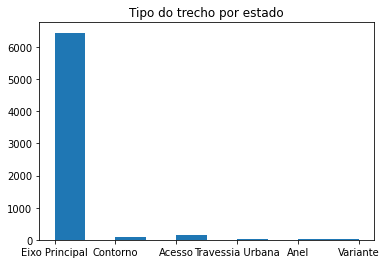

<Figure size 3600x3456 with 0 Axes>

In [ ]:
#histograma do tipo do trecho em cada estado, vias de eixo principal são a maioria esmagadora dos tipos analisados,
#uma vez que estamos tratando de trafego rodoviário
histogramaTipo=plt.hist(base['nm_tipo_tr'])
histogramaTipo=plt.title("Tipo do trecho por estado")
histogramaTipo=plt.figure( figsize=(50, 48))
histogramaTipo=plt.gcf().set_size_inches(50, 48)
histogramaTipo

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


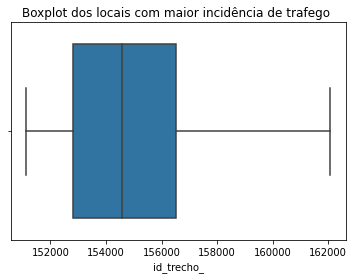

In [ ]:
#na sequencia um boxplot relacionado aos em cada local
bpLocais=sns.boxplot(base['id_trecho_']).set_title("Boxplot dos locais com maior incidência de trafego ")

Text(0.5, 1.0, 'Estados')

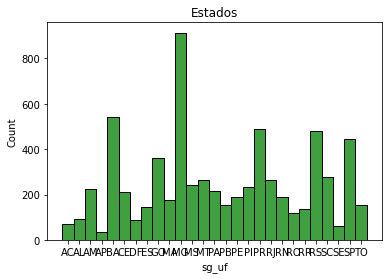

In [ ]:
#histograma com linha de distribuição de frequencia por estados:
sns.histplot(base.iloc[:,3],kde=False,bins=15,color='green').set_title('Estados')

Text(0.5, 1.0, 'Vias de trafego')

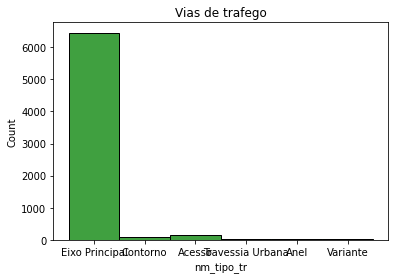

In [ ]:

sns.histplot(base.iloc[:,4],kde=False,bins=10,color='green').set_title('Vias de trafego')

In [ ]:
#regressao linear simples: trecho por via
#dia Feb/19, troca das variaveis , id passa a ser indep e trecho indep
variavelI=base.iloc[:,0].values
variavelT=base.iloc[:,1].values

In [ ]:
#construção da correlacao: 0.68 o que representa uma correlacao minimamente alta
correlacao=np.corrcoef(variavelI,variavelT)
correlacao

array([[1.        , 0.59566664],
       [0.59566664, 1.        ]])

In [ ]:
variavelI= variavelI.reshape(-1,1)#transformando variavel independente(trecho) em matriz de linha única para o modelo de regressao
modeloIT=LinearRegression()

In [ ]:
#ajuste do modelo
modeloIT.fit(variavelI,variavelT)

LinearRegression()

In [ ]:
#vizualizar interceptacoes das var's
modeloIT.intercept_

152455.23156947325

In [ ]:
#coefcientes, mostrando uma interpretação BAIXA do cenário real , uma vez q obtido foi 38.96%
modeloIT.coef_

array([0.63290986])

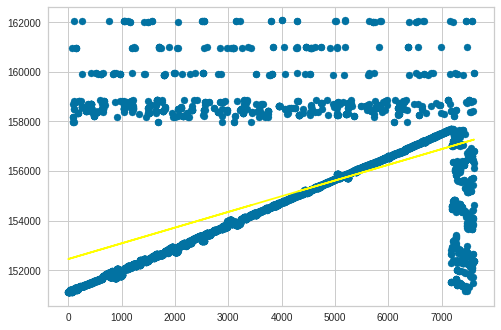

In [ ]:
#gráfico, necessita ajustes, tratar outliers , estão inpedindo desenvolvimento do modelo
plt.scatter(variavelI,variavelT)
plt.plot(variavelI,modeloIT.predict(variavelI),color='yellow')

In [ ]:
modeloIT.intercept_ + modeloIT.coef_ *100

array([152518.52255557])

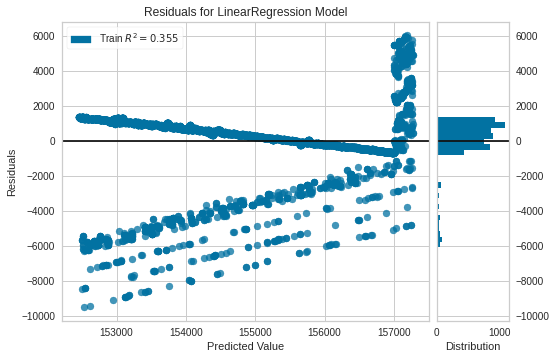

In [ ]:
# Gráfico para visualizar os residuais, residuais apresentam tendencia , o que torna o modelo ruim
#além do fato que histograma NÃO apresenta distribuição normal
visualizador = ResidualsPlot(modeloIT)
visualizador.fit(variavelI,variavelT)
visualizador.poof()

In [7]:
#relacionando estado com a via
est=base.iloc[:,0].values
via=base.iloc[:,2].values

In [8]:
correlacao=np.corrcoef(est,via)

In [9]:
est=est.reshape(-1,1)

In [10]:
modelo2=LinearRegression()

In [12]:
modeloAjuste=modelo2.fit(est,via)

In [13]:
modelo2.intercept_

52.7754482942255

In [14]:
modelo2.score(est,via)

0.7657398753245945

In [15]:
#previsao do novo modelo feito po regressao logistíca
previsao=modelo2.predict(est)

In [18]:
modeloAjuste=sm.ols(formula='est ~ via', data=base)

In [19]:
#modelo de treino para previsao
treino=modeloAjuste.fit()

In [20]:
treino.summary()
#sumario dos resultados

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    est   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                 2.212e+04
Date:                Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:56:21   Log-Likelihood:                -56864.
No. Observations:                6769   AIC:                         1.137e+05
Df Residuals:                    6767   BIC:                         1.137e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    102.8519     27.472      3.744      0.000      48.999     156.705
via           14.4526      0.097    148.727      0.000      14.262      14.643
==============================================================================
Omnibus:                     5982.210   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           136316.610
Skew:                           4.423   Prob(JB):                         0.00
Kurtosis:                      23.127   Cond. No.                         593.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

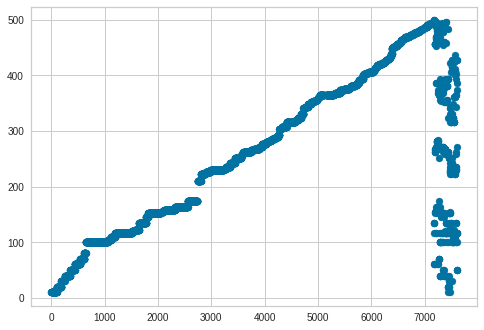

In [21]:
#plotagem do gráfico com resultados
plt.scatter(est,via)

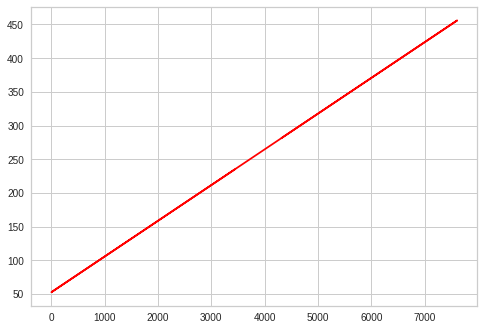

In [22]:
#gráfico de previsão, erro no gráfico , corrigir
#plt.plot(est,previsao,color='red')